<a href="https://colab.research.google.com/github/erenkho/EKHO/blob/main/Tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basics

#### Classification

In [ ]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)

In [ ]:
N, D = X_train.shape
N, D

(381, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler
#mean 0, variance 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#####`tf.keras.models.Sequential()`
#####`model.add(keras.Input(shape=(D,)))`
#####`model.add(keras.layers.Dense(1,activation='sigmoid'))`

> basic neural network with one input layer and one output layer with a single neuron





In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#Alternatively
#model = keras.Sequential()
#model.add(keras.Input(shape=(D,)))
#model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2596 - loss: 1.1263 - val_accuracy: 0.3138 - val_loss: 1.0228
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3372 - loss: 0.9977 - val_accuracy: 0.3723 - val_loss: 0.9358
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4216 - loss: 0.9033 - val_accuracy: 0.4628 - val_loss: 0.8595
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4946 - loss: 0.8732 - val_accuracy: 0.5160 - val_loss: 0.7915
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5230 - loss: 0.7737 - val_accuracy: 0.5479 - val_loss: 0.7334
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5563 - loss: 0.7429 - val_accuracy: 0.5851 - val_loss: 0.6806
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6593 - loss: 0.6555 - val_accuracy: 0.6064 - val_loss: 0.6346
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6614 - loss: 0.6681 - val_accuracy: 0.6543 -

In [ ]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9834 - loss: 0.1018 
Train score: [0.11437537521123886, 0.9763779640197754]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9678 - loss: 0.1153 
Test score: [0.11223767697811127, 0.978723406791687]


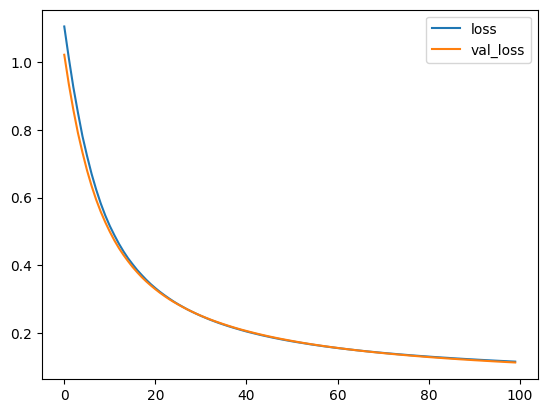

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

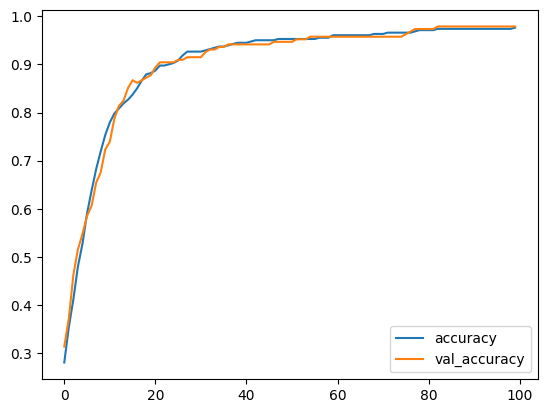

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

##### Predictions

In [ ]:
P = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
import numpy as np
P = np.round(P).flatten()

In [ ]:
print("Manual accuracy:", np.mean(P == y_test))
print("Model accuracy:", model.evaluate(X_test, y_test))

Manual accuracy: 0.9787234042553191
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9678 - loss: 0.1153
Model accuracy: [0.11223767697811127, 0.978723406791687]


#### Regression

In [ ]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-07-21 21:01:27--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-07-21 21:01:27 (29.5 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [ ]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [ ]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1) # NxD matrix
Y = data[:,1]

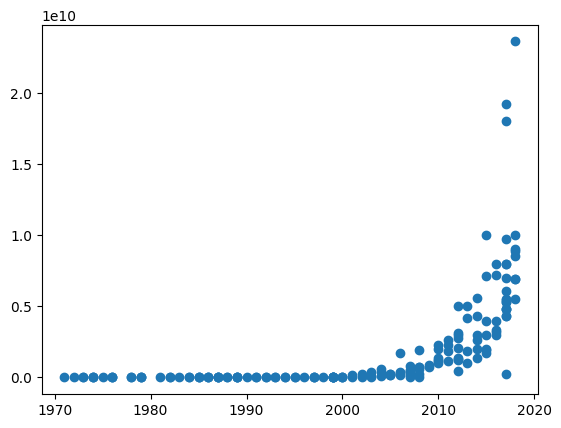

In [ ]:
# exponential
plt.scatter(X,Y)

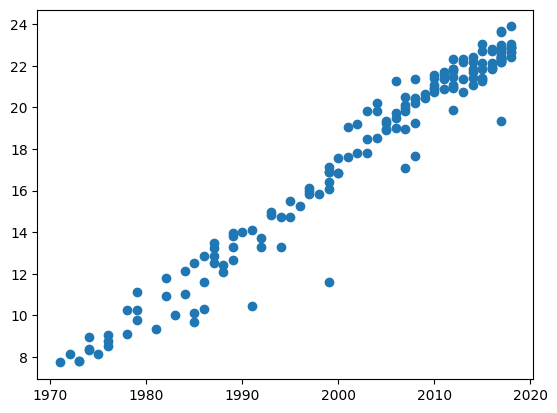

In [ ]:
plt.scatter(X,np.log(Y))

In [ ]:
Y = np.log(Y)

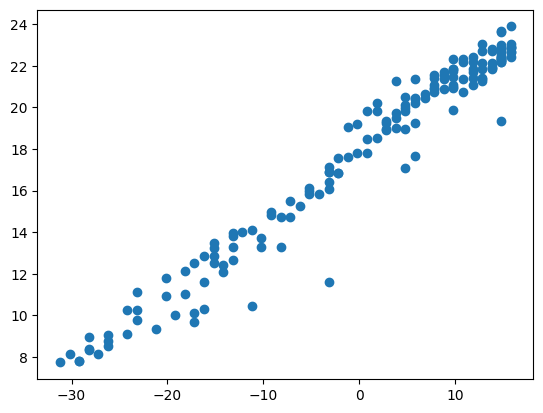

In [ ]:
plt.scatter(X-X.mean(),Y)

In [ ]:
X = X-X.mean()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

We didn't scale our data so we will use a custom optimizer instead of 'adam'



```
SGD - Gradient descent (with momentum) optimizer.
```


Update rule for parameter w with gradient g when momentum is 0:

$$w = w - learningRate * g$$
Update rule when momentum is larger than 0:

$$velocity = momentum * velocity - learningRate * g$$
$$w = w + velocity$$
When nesterov=True, this rule becomes:

$$velocity = momentum * velocity - learningRate * g$$
$$w = w + momentum * velocity - learningRate * g$$

#####`tf.keras.optimizers.SGD()`



In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss = 'mse',

)

#####`tf.keras.callbacks.LearningRateScheduler(schedule)`

In [ ]:
# lr : learning rate
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 424.4896 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 448.4466 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 414.6295 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 274.4012 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 149.7013 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 119.8045 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 114.5795 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.8889 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 68.4261 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.5519 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.8549 - learning_rate: 0.0010
Epoch 12/200

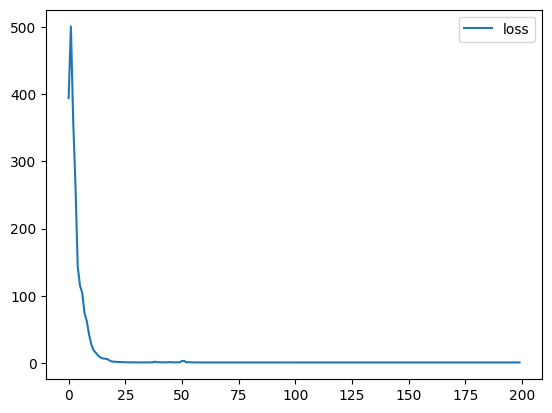

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [ ]:
model.layers

[<Dense name=dense_4, built=True>]

In [ ]:
model.layers[0].get_weights()

[array([[0.34129706]], dtype=float32), array([17.769493], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0, 0]
b = model.layers[0].get_weights()[1][0]

In [ ]:
print("Time to double:", np.log(2)/a)

Time to double: 2.0309204540165244


In [ ]:
X = X.flatten()
denominator = X.dot(X) - X.mean()*X.sum()
a = (X.dot(Y) - Y.mean()*X.sum()) / denominator
b = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y)) / denominator
print(a,b)

0.341682487387313 17.764939393631764


#####Predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


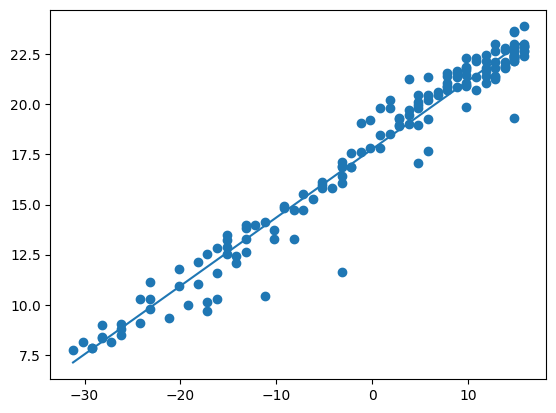

In [ ]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [ ]:
#manual way

#weights
w,b = model.layers[0].get_weights()

X = X.reshape(-1,1)

Yhat2 = (X.dot(w.T) + b).flatten()

np.allclose(Yhat, Yhat2)

True

In [ ]:
model.evaluate(X,Y)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9264 


0.8730379343032837

#### Saving the model

In [ ]:
model.save('linear_regression.keras')

In [ ]:
!ls -lh

total 48K
-rw-r--r-- 1 root root  17K Jul 21 20:56 linear_regression.h5
-rw-r--r-- 1 root root  15K Jul 21 20:57 linear_regression.keras
-rw-r--r-- 1 root root 2.3K Jul 21 20:36 moore.csv
-rw-r--r-- 1 root root 2.3K Jul 21 20:43 moore.csv.1
drwxr-xr-x 1 root root 4.0K Jul 18 13:38 sample_data


In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-07-21 21:05:20--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.3’

moore.csv.3         100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-07-21 21:05:20 (12.0 MB/s) - ‘moore.csv.3’ saved [2302/2302]



In [ ]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1) # NxD matrix
Y = data[:,1]
Y = np.log(Y)
X = X-X.mean()

In [ ]:
model = tf.keras.models.load_model('linear_regression.keras')
print(model.layers)
model.evaluate(X,Y)

[<Dense name=dense_3, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9264  


0.8730379343032837

### ANN

#### Classification - MNIST

In [ ]:
#!pip install -q tensorflow-gpu==2.0.0
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'2.19.0'

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape

(60000, 28, 28)

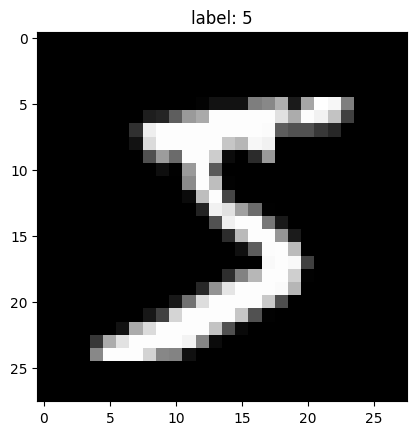

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"label: {y_train[0]}")
plt.show()

In [ ]:
#Model the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8593 - loss: 0.4859 - val_accuracy: 0.9585 - val_loss: 0.1413
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9569 - loss: 0.1471 - val_accuracy: 0.9701 - val_loss: 0.0996
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9655 - loss: 0.1110 - val_accuracy: 0.9707 - val_loss: 0.0940
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9741 - loss: 0.0855 - val_accuracy: 0.9769 - val_loss: 0.0737
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9767 - loss: 0.0746 - val_accuracy: 0.9791 - val_loss: 0.0707
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9785 - loss: 0.0672 - val_accuracy: 0.9776 - val_loss: 0.0729
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9812 - loss: 0.0587 - val_accuracy: 0.9785 - val_loss: 0.0755
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9838 - loss: 0.0507 

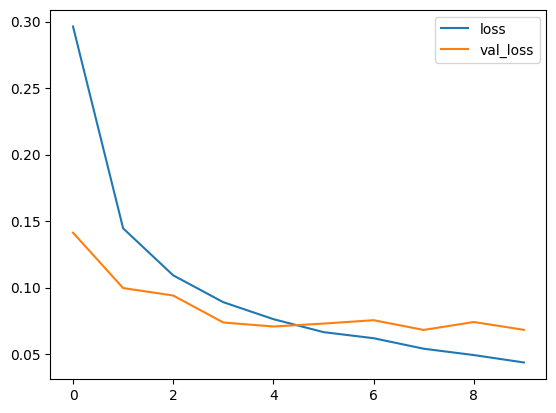

In [ ]:
#loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

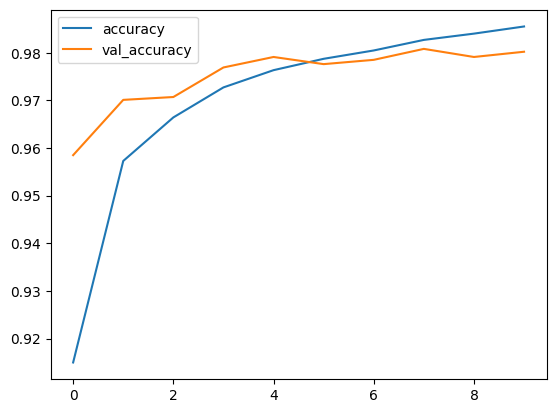

In [ ]:
#accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
#Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0833
[0.06822077929973602, 0.9801999926567078]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix, without normalization
[[ 968    0    1    3    2    2    1    1    1    1]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   3    0 1010    5    2    0    1    4    6    1]
 [   0    0    6  994    0    0    0    6    2    2]
 [   0    0    1    0  961    0    6    2    1   11]
 [   2    0    0   13    2  860    7    1    4    3]
 [   4    2    2    1    2    1  945    0    1    0]
 [   3    2    9    2    0    0    0 1004    1    7]
 [   2    0    4    6    2    1    2    2  952    3]
 [   0    3    0    5    8    1    1    6    2  983]]


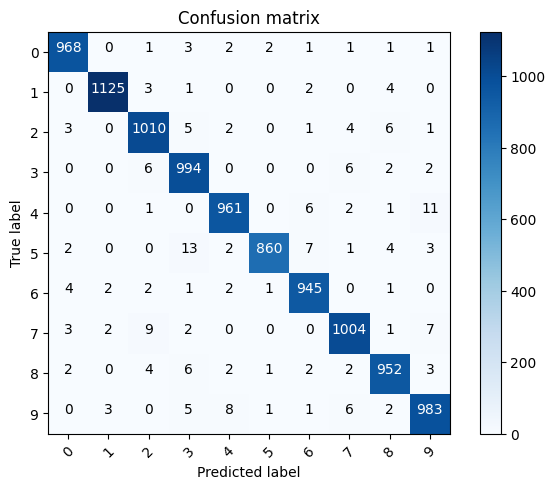

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

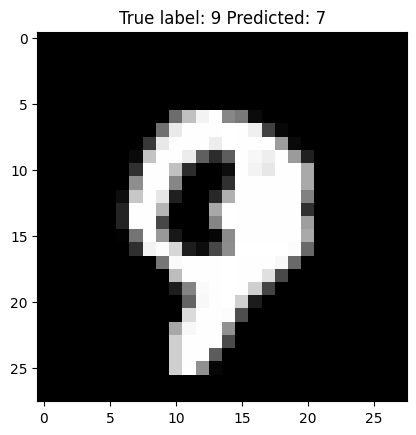

In [ ]:
#show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

#### Regression

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
tf.__version__

'2.19.0'

In [ ]:
#dataset
N = 1000
X = np.random.random((N, 2))*6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements this function:
$$y=\cos{2x_1}+\cos{3x_2}$$

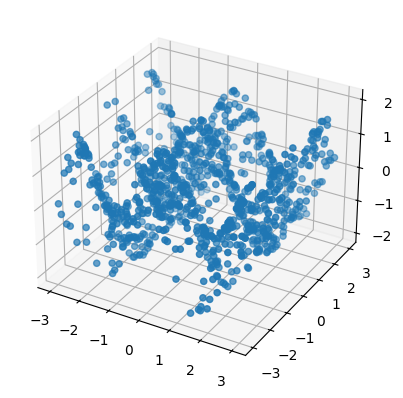

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [ ]:
#Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile and fit
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

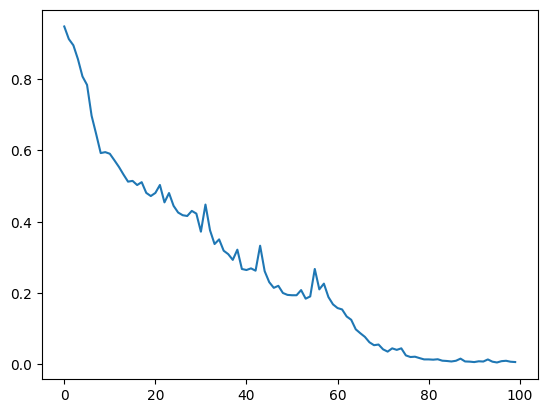

In [ ]:
plt.plot(r.history['loss'],label='loss')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


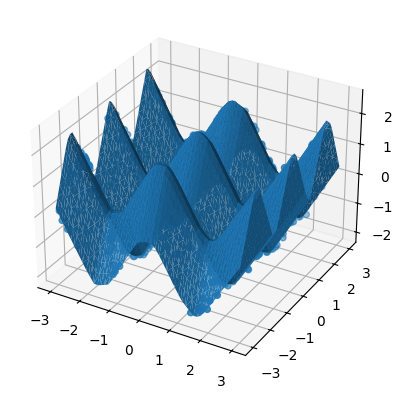

In [ ]:
#Prediction Surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line=np.linspace(-3,3,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.1, antialiased=True)
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


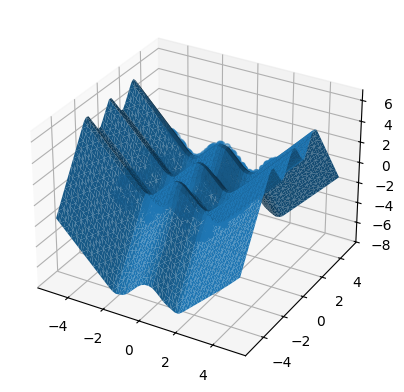

In [ ]:
#Can it extrapolate?
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line=np.linspace(-5,5,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)

### Data Module - tf.data

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.data.shape

(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)

In [ ]:
X_test.shape

(188, 30)

In [ ]:
Y_train.shape

(381,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create tensorflow dataset
train_dataset=tf.data.Dataset.from_tensor_slices((X_train,Y_train))
test_dataset=tf.data.Dataset.from_tensor_slices((X_test,Y_test))

In [ ]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
#Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#

In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

*In the context of training neural networks, the batch size determines the number of samples that will be propagated through the network at once during each training iteration*

In [ ]:
#Train the model
batch_size = 32

#old way
#r=model.fit(X_train,Y_train,
#            validation_data=(X_test,y_test),
#            epochs=15)

#New way
r=model.fit(train_dataset.batch(batch_size),
            validation_data=test_dataset.batch(batch_size),
            epochs=15)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4957 - loss: 0.6404 - val_accuracy: 0.8404 - val_loss: 0.4572
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9044 - loss: 0.3834 - val_accuracy: 0.9309 - val_loss: 0.3107
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9466 - loss: 0.2612 - val_accuracy: 0.9521 - val_loss: 0.2333
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9556 - loss: 0.1980 - val_accuracy: 0.9574 - val_loss: 0.1877
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9618 - loss: 0.1611 - val_accuracy: 0.9574 - val_loss: 0.1583
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9633 - loss: 0.1377 - val_accuracy: 0.9574 - val_loss: 0.1382
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9689 - loss: 0.1217 - val_accuracy: 0.9628 - val_loss: 0.1237
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9689 - loss: 0.1099 - val_accuracy: 0.9681 - val_loss

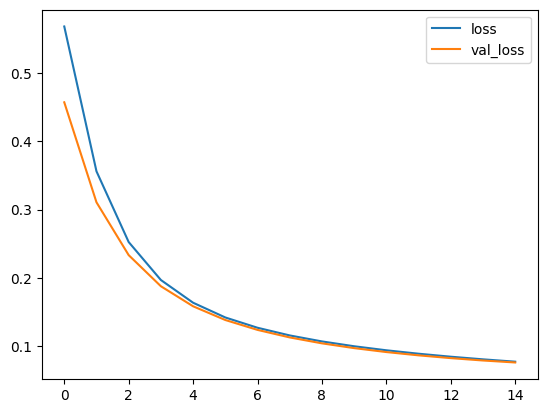

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

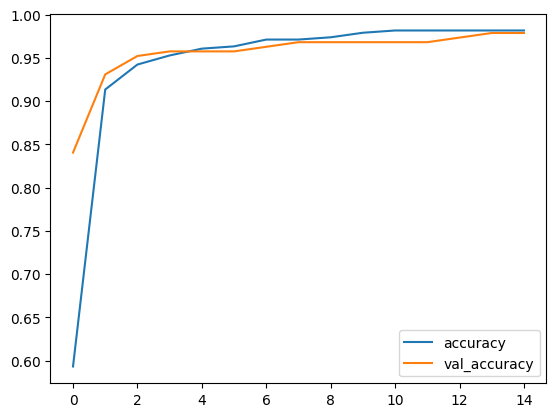

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
model.evaluate(test_dataset.batch(batch_size))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9678 - loss: 0.0765


[0.07596450299024582, 0.978723406791687]

### CNN

#### Fashion MNIST

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
#load the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
#convoltion expects h x w x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
#number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
# (28, 28, 1)
i = Input(shape=x_train[0].shape)
# This adds a second convolutional layer with 32 filters and a 3x3 kernel, also with a stride of 2 and ReLU activation.
# We increase the number of feature maps
x = Conv2D(32, (3,3), strides=2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides=2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides=2, activation = 'relu')(x)
# This layer flattens the output of the last convolutional layer into a 1D array, preparing it for the dense layers.
x = Flatten()(x)
# This adds a dropout layer with a dropout rate of 0.2.
# This layer randomly sets 20% of the input units to 0 during training, which helps prevent overfitting.
x = Dropout(0,2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

In [ ]:
# Compile and fit
model.compile(optimizer='adam',
              #best for non one-hot encoded data
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7531 - loss: 0.6779 - val_accuracy: 0.8415 - val_loss: 0.4091
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8638 - loss: 0.3607 - val_accuracy: 0.8601 - val_loss: 0.3743
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8872 - loss: 0.2984 - val_accuracy: 0.8827 - val_loss: 0.3232
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9022 - loss: 0.2601 - val_accuracy: 0.8874 - val_loss: 0.3122
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9147 - loss: 0.2286 - val_accuracy: 0.8924 - val_loss: 0.3024
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9258 - loss: 0.1958 - val_accuracy: 0.8929 - val_loss: 0.3215
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9350 - loss: 0.1707 - val_accuracy: 0.8945 - val_loss: 0.3266
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9430 - loss: 0.14

> model is overfitting since the val loss goes high

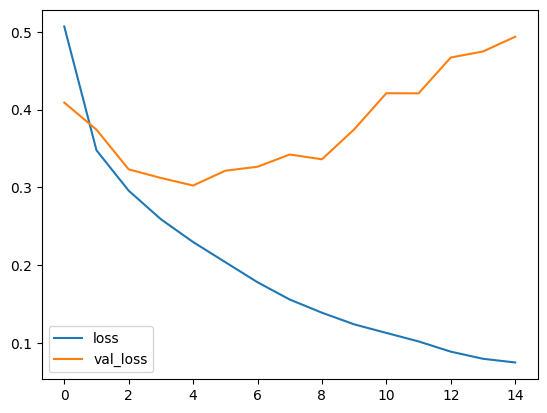

In [ ]:
# loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

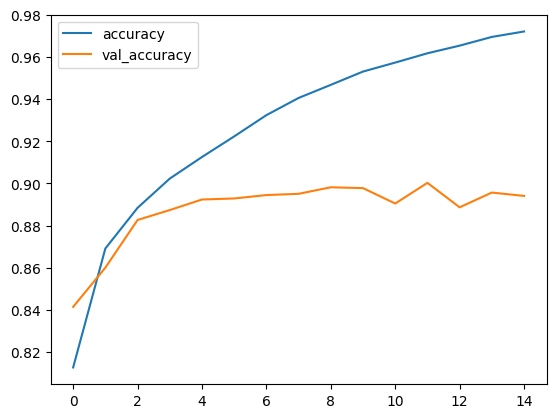

In [ ]:
# accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[875   3  26  17   4   4  65   0   6   0]
 [  3 977   0  14   2   0   1   0   3   0]
 [ 13   0 873  10  38   0  64   0   2   0]
 [ 13   5  18 902  31   3  26   0   2   0]
 [  4   2  89  27 806   0  64   0   8   0]
 [  0   0   0   1   0 978   0  15   0   6]
 [132   0  76  22 114   1 641   0  14   0]
 [  0   0   0   0   0  19   0 954   0  27]
 [  3   0   7   0   4   5   7   3 971   0]
 [  0   0   0   0   0   6   1  29   0 964]]


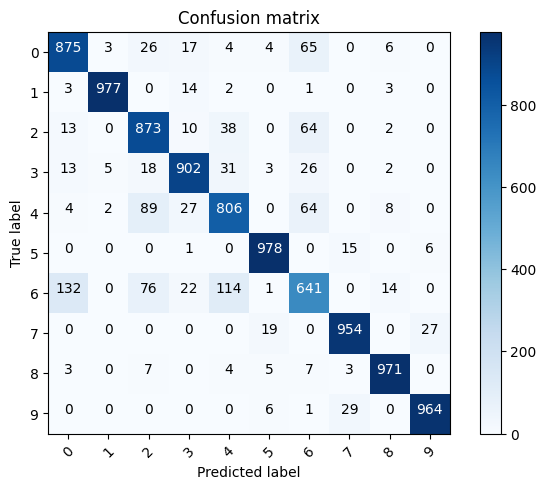

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

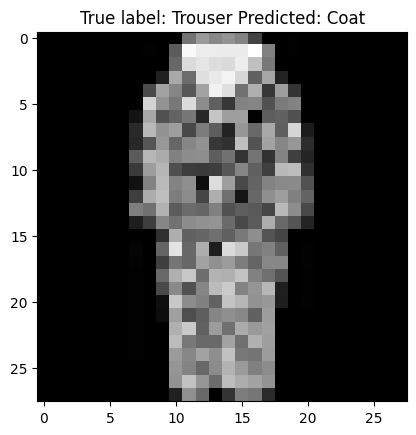

In [ ]:
#show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

#### CIFAR-10

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [6]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [7]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [8]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
#x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
#x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
#x = Dropout(0.2)(x)

#x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
 165/1563 ━━━━━━━━━━━━━━━━━━━━ 35:43 2s/step - accuracy: 0.2353 - loss: 11.9792

KeyboardInterrupt: 

##### Data Augmentation

In [ ]:
#Fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
   4/1562 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6628 - loss: 2.2017 

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5894 - loss: 1.2805 - val_accuracy: 0.6938 - val_loss: 1.1186
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6562 - loss: 0.9638

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.6562 - loss: 0.9638 - val_accuracy: 0.6957 - val_loss: 1.1322
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6790 - loss: 0.9623 - val_accuracy: 0.7383 - val_loss: 0.8397
Epoch 4/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.5312 - loss: 1.1598

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.5312 - loss: 1.1598 - val_accuracy: 0.7362 - val_loss: 0.8498
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.6948 - loss: 0.9047 - val_accuracy: 0.7272 - val_loss: 0.8898
Epoch 6/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6875 - loss: 1.4172

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.6875 - loss: 1.4172 - val_accuracy: 0.7267 - val_loss: 0.8864
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7057 - loss: 0.8737 - val_accuracy: 0.7460 - val_loss: 0.8050
Epoch 8/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7188 - loss: 0.8173

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.7188 - loss: 0.8173 - val_accuracy: 0.7433 - val_loss: 0.8112
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7153 - loss: 0.8469 - val_accuracy: 0.7348 - val_loss: 0.7956
Epoch 10/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7500 - loss: 0.6399

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.7500 - loss: 0.6399 - val_accuracy: 0.7362 - val_loss: 0.7931
Epoch 11/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7258 - loss: 0.8126 - val_accuracy: 0.7283 - val_loss: 1.2723
Epoch 12/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.6562 - loss: 1.1971 - val_accuracy: 0.7218 - val_loss: 1.3764
Epoch 13/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7244 - loss: 0.8131 - val_accuracy: 0.7375 - val_loss: 0.8126
Epoch 14/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.5938 - loss: 1.0218 - val_accuracy: 0.7401 - val_loss: 0.7964
Epoch 15/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.7339 - loss: 0.7849 - val_accuracy: 0.7112 - val_loss: 1.7630
Epoch 16/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.8750 - loss: 0.5366 - val_accuracy: 0.7182 - val_loss: 1.5305
Epoch 17/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7356 - los

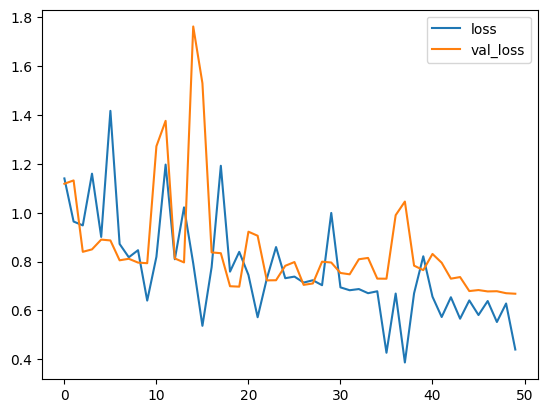

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

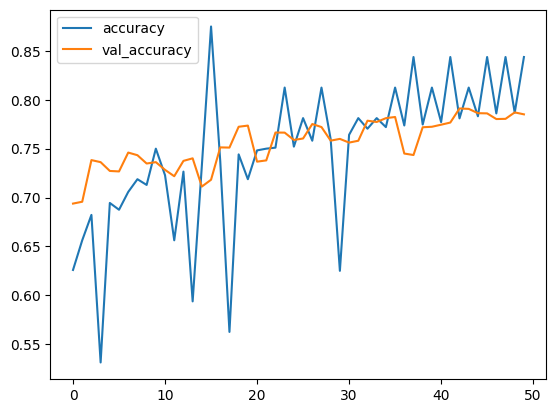

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Confusion matrix, without normalization
[[880   7  28   8  13   2   6   7  31  18]
 [ 15 921   1   4   3   0  10   3  15  28]
 [ 57   2 680  47  99  15  75  19   3   3]
 [ 39   2  48 603  91  66 113  22  10   6]
 [ 17   1  49  27 801   7  60  32   6   0]
 [ 22   1  39 209  67 551  60  41   5   5]
 [  9   3  29  23  16   1 915   4   0   0]
 [ 16   0  22  19  77  15   3 846   0   2]
 [ 70  22  14   8  10   0   7   0 852  17]
 [ 48  88   3  18   1   1   9  16  14 802]]


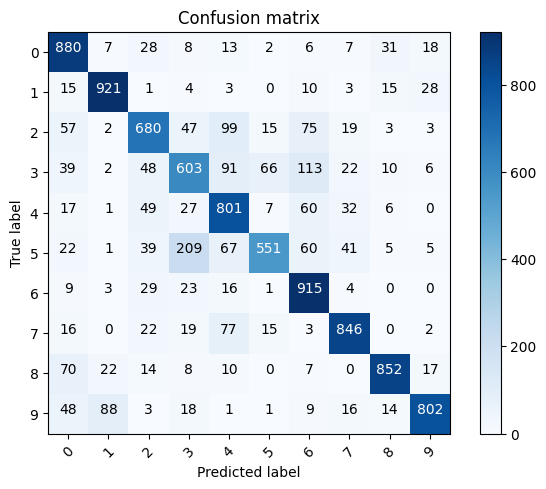

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

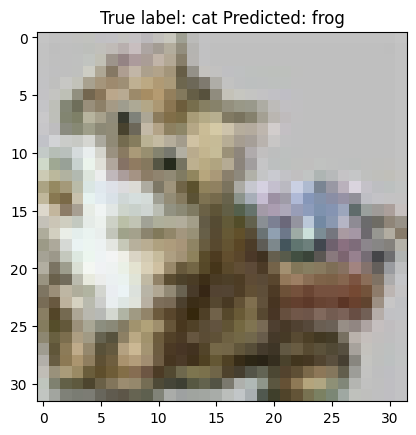

In [ ]:
#show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));